# **Proyecto Orange** 
### **Responsables: Andrés Felipe Ocampo, Alejandra Ruiz y Luis Felipe Montenegro**

# **Sección 1 - Análisis Exploratorio de Datos**

Caracterización de los registros existentes en la base de datos, con el objetivo de aterrizar el dominio del problema. Para esto es necesario:

- Diseño y estructuración de la base de datos
- Generación de gráficos, análisis descriptivo y estadística inferencial (deseable)
- Análisis de correlación univariada
  

In [ ]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
#from prince import MCA

In [ ]:
#Lectura de datos

df = pd.read_excel('prueba.xlsx', header=8)
pd.set_option('display.max_columns', None)


In [4]:
# Leer encabezados de dimensiones (desde fila 3 a 8)

#Se leen los encabezados de las dimensiones de la encuesta, las cuales se encuentran entre la fila 3 y la 8

df_headers = pd.read_excel('prueba.xlsx', header=None, nrows=8)
dimension_metadata = df_headers.iloc[2:8, :].transpose()
dimension_metadata.columns = ['Dynamic_Capability_Stage', 'Columna_Validar_1', 'Business_Parameters', 'Business_Sub_Parameters', 'Columna_Validar_2', 'Variable_Metrics']


#Se identifica la columna en la que se encuentran las preguntas. 

dimension_metadata_filtered = dimension_metadata.iloc[27:].reset_index(drop=True)
question_columns = df.columns[27:]

# Construir tabla de metadatos

metadata_df = pd.DataFrame({
    'Pregunta_Columna': question_columns
})
metadata_df = pd.concat([metadata_df, dimension_metadata_filtered.reset_index(drop=True)], axis=1)

# Melt Data 

id_vars = df.columns[:27]
value_vars = df.columns[27:]

df_melted = df.melt(id_vars=id_vars, value_vars=value_vars,
                    var_name='Pregunta_Columna', value_name='Respuesta')

# Unir con metadatos

df_final = df_melted.merge(metadata_df, on='Pregunta_Columna', how='left')

# Mostrar la información

print(df_final.head())

  Company  Company_number LT \nLeader of Team)\n \nor\n \nTM \n(Team Member)  \
0     C01               1                                                 LT   
1     C01               1                                                 TM   
2     C02               2                                                 LT   
3     C02               2                                                 TM   
4     C03               3                                                 LT   

     CODE Industry            1 industry/sector: 2 company size  \
0  C01-LT   Manufa             Manufactura, Moda            Big   
1  C01-TM   Manufa             Manufactura, Moda            Big   
2  C02-LT   Servic  Servicios, Comidas y bebidas            Big   
3  C02-TM   Servic  Servicios, Comidas y bebidas            Big   
4  C03-LT   Manufa             Manufactura, Moda            Big   

   3 Age of the company: Age of the company (segment)  \
0                     29                    25+ years   
1 

In [5]:
df_transformado = df_final.copy()


In [6]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13776 entries, 0 to 13775
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Company                                        13776 non-null  object 
 1   Company_number                                 13776 non-null  int64  
 2   LT 
Leader of Team)
 
or
 
TM 
(Team Member)   13776 non-null  object 
 3   CODE                                           13776 non-null  object 
 4   Industry                                       13776 non-null  object 
 5   1 industry/sector:                             13776 non-null  object 
 6   2 company size                                 13776 non-null  object 
 7   3 Age of the company:                          13776 non-null  int64  
 8   Age of the company (segment)                   13776 non-null  object 
 9   4 Geographic reach location:                   137

# Análisis Univariado

### Transformación del dataset

In [7]:
# Copia de dataset
df_univariado=df.copy()

# Eliminar duplicados en Company
df_univariado  = df_univariado.drop_duplicates(subset=['Company'])

# Elegir columnas a analizar (5 a la 15)
df_univariado = df_univariado.iloc[:, 5:15]
df_univariado.columns

# Dividir la columna 'industry_sector' en dos nuevas columnas: 'industry' y 'sector'
df_univariado[['industry', 'sector']] = df_univariado['1 industry/sector:'].str.split(', ', n=1, expand=True)

# Cambio de rtipo de variable de Sales
df_univariado['6 new products sales:'] = df_univariado['6 new products sales:'].astype(str).str.replace('.', '', regex=False)
df_univariado['6 new products sales:'] = (
    df_univariado['6 new products sales:']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)
df_univariado

df_univariado.head(5)

<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
C:\Users\1143835519\AppData\Local\Temp\ipykernel_32164\1049564932.py:18: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,industry,sector
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,1.785000e+10,12,0.18,85000000000,Manufactura,Moda
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2.835000e+09,8,0.24,94500000000,Servicios,Comidas y bebidas
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,1.320000e+10,4,0.10,110000000000,Manufactura,Moda
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4.800000e+09,6,0.15,13450000000,Servicios,Transporte y logística
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3.850000e+09,4,0.08,19250000000,Servicios,Tecnología


### Industry

In [8]:
df_univariado['industry'].describe()

count              28
unique              3
top       Manufactura
freq               14
Name: industry, dtype: object

In [9]:
tabla_freq=(pd.crosstab(index=df_univariado["industry"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,industry,Freq. Abs.,Freq. Rel.
0,Manufactura,14,0.500000
1,Servicios,8,0.285714
2,Comercio,6,0.214286


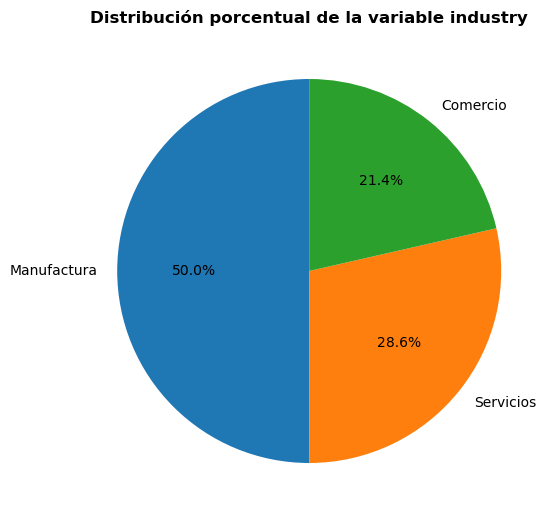

In [10]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["industry"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la variable industry", fontweight='bold')
plt.show()

### Sector

In [11]:
df_univariado['sector'].describe()

count       28
unique      16
top       Moda
freq         8
Name: sector, dtype: object

In [12]:
tabla_freq=(pd.crosstab(index=df_univariado["sector"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,sector,Freq. Abs.,Freq. Rel.
0,Moda,8,0.285714
1,Construcción,4,0.142857
2,Comidas y bebidas,2,0.071429
3,Educación,2,0.071429
4,Automotor,1,0.035714
5,Belleza y cuidado personal,1,0.035714
6,Deportes,1,0.035714
7,Empaques,1,0.035714
8,Energía,1,0.035714
9,Ferroelectrico,1,0.035714


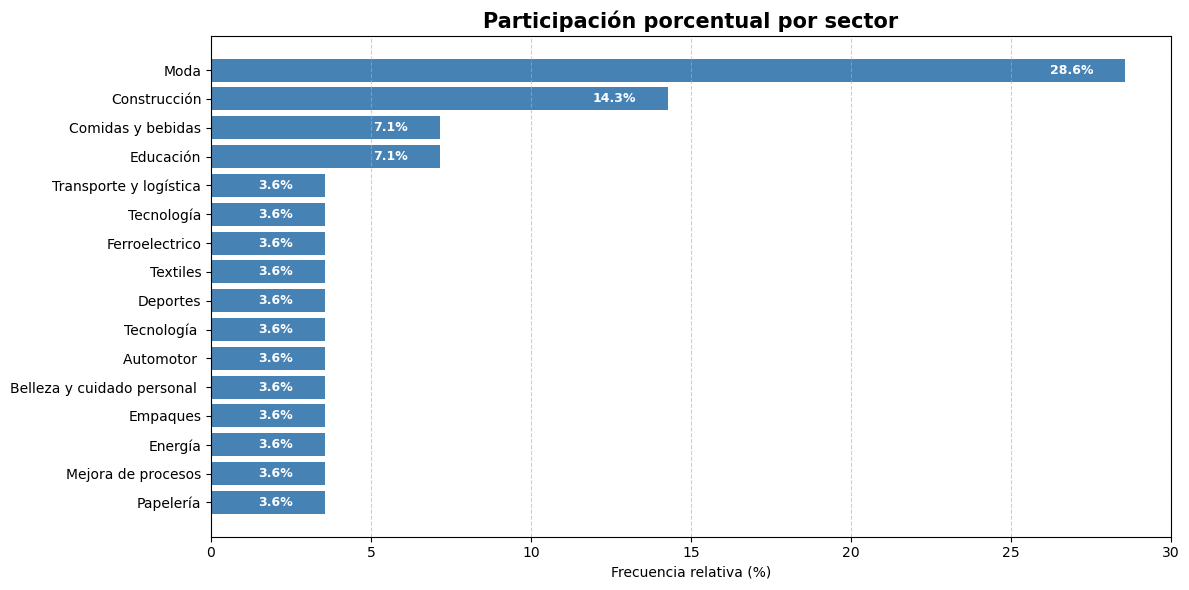

In [13]:
# Recalcular sector_freq_sorted por si se perdió en el contexto
sector_freq = df_univariado['sector'].value_counts().reset_index()
sector_freq.columns = ['sector', 'frecuencia_absoluta']
sector_freq['frecuencia_relativa'] = sector_freq['frecuencia_absoluta'] / sector_freq['frecuencia_absoluta'].sum()
sector_freq_sorted = sector_freq.sort_values(by="frecuencia_relativa", ascending=False)

# Crear el gráfico de barras con etiquetas al extremo derecho y en color blanco
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    sector_freq_sorted["sector"],
    sector_freq_sorted["frecuencia_relativa"] * 100,
    color="#4682B4"
)

# Añadir etiquetas en blanco al final de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2,
            f"{width:.1f}%", va='center', ha='right', color='white', fontsize=9, fontweight='bold')

# Configuración estética
ax.set_xlabel("Frecuencia relativa (%)")
ax.set_title("Participación porcentual por sector", fontsize=15, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Age de la empresa

In [14]:
df_univariado['3 Age of the company:'].describe()

count    28.000000
mean     19.142857
std      12.270755
min       5.000000
25%       7.750000
50%      17.500000
75%      25.500000
max      47.000000
Name: 3 Age of the company:, dtype: float64

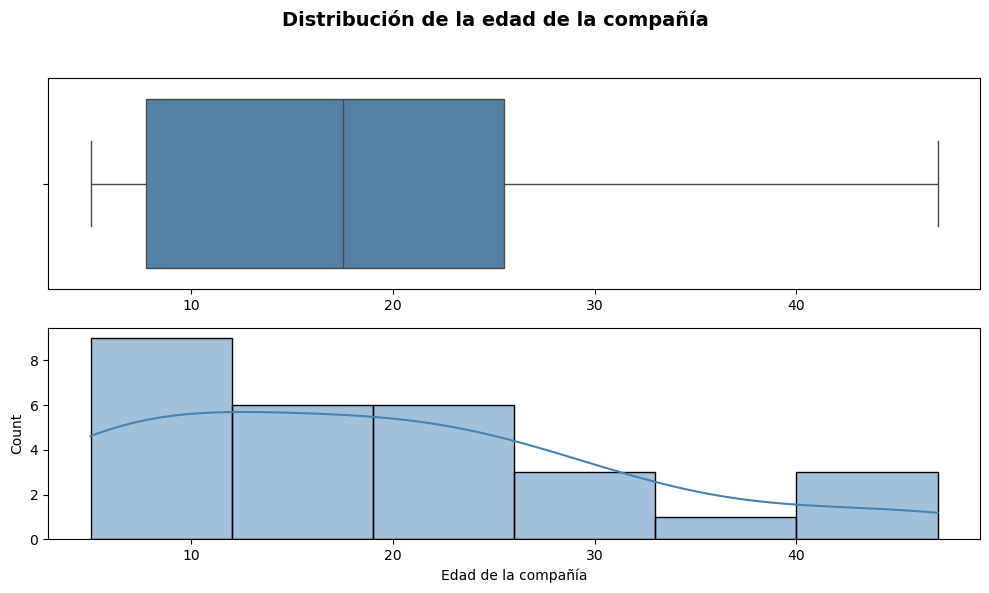

In [15]:
# Crear figura con dos subgráficos (uno para boxplot y otro para histograma)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de la edad de la compañía",
             fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(x=df_univariado['3 Age of the company:'], color="steelblue", ax=axs[0])
axs[0].set_xlabel("")
#axs[0].set_title("Boxplot")

# Histograma con KDE
sns.histplot(df_univariado['3 Age of the company:'], kde=True, color="steelblue", ax=axs[1])
axs[1].set_xlabel("Edad de la compañía")
#axs[1].set_title("Histograma con KDE")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título principal
plt.show()

### Age of the company (segment)

In [16]:
df_univariado['Age of the company (segment)'].value_counts()

Age of the company (segment)
15-25 years    10
25+ years       8
5-8 years       8
8-15 years      2
Name: count, dtype: int64

In [17]:
df_univariado['Age of the company (segment)'].describe()

count              28
unique              4
top       15-25 years
freq               10
Name: Age of the company (segment), dtype: object

In [18]:
tabla_freq=(pd.crosstab(index=df_univariado["Age of the company (segment)"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Age of the company (segment),Freq. Abs.,Freq. Rel.
0,15-25 years,10,0.357143
1,25+ years,8,0.285714
2,5-8 years,8,0.285714
3,8-15 years,2,0.071429


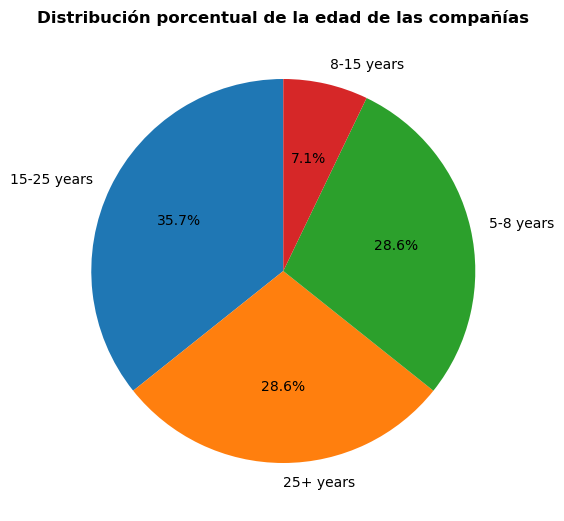

In [19]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["Age of the company (segment)"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la edad de las compañías", fontweight='bold')
plt.show()

### Ubicación geográfica de la compañía

In [20]:
df_univariado['4 Geographic reach location:'].describe()

count        28
unique        4
top       Local
freq         14
Name: 4 Geographic reach location:, dtype: object

In [21]:
tabla_freq=(pd.crosstab(index=df_univariado["4 Geographic reach location:"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,4 Geographic reach location:,Freq. Abs.,Freq. Rel.
0,Local,14,0.500000
1,National,9,0.321429
2,International,3,0.107143
3,Regional,2,0.071429


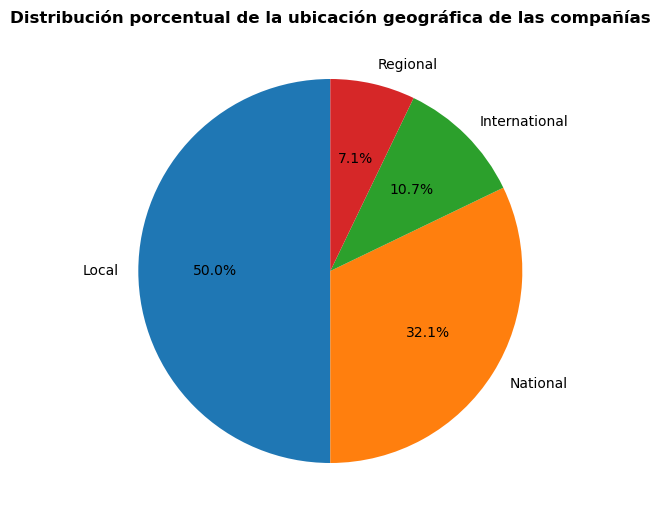

In [22]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["4 Geographic reach location:"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la ubicación geográfica de las compañías", fontweight='bold')
plt.show()

In [23]:
###

In [24]:
df_univariado['3 Age of the company:'].describe()

count    28.000000
mean     19.142857
std      12.270755
min       5.000000
25%       7.750000
50%      17.500000
75%      25.500000
max      47.000000
Name: 3 Age of the company:, dtype: float64

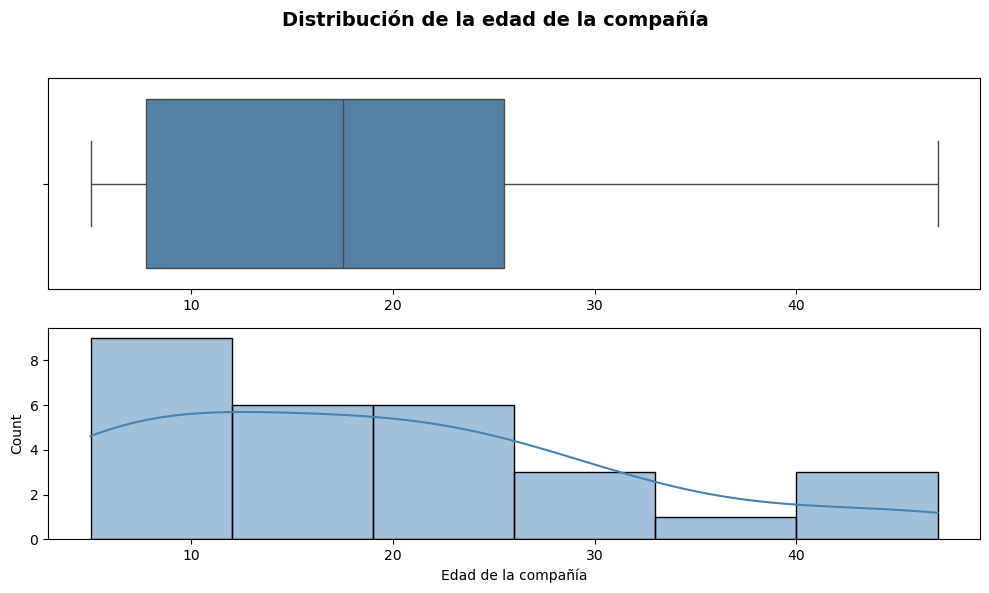

In [25]:
# Crear figura con dos subgráficos (uno para boxplot y otro para histograma)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de la edad de la compañía",
             fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(x=df_univariado['3 Age of the company:'], color="steelblue", ax=axs[0])
axs[0].set_xlabel("")
#axs[0].set_title("Boxplot")

# Histograma con KDE
sns.histplot(df_univariado['3 Age of the company:'], kde=True, color="steelblue", ax=axs[1])
axs[1].set_xlabel("Edad de la compañía")
#axs[1].set_title("Histograma con KDE")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título principal
plt.show()

### Gastos en I+D

In [26]:
df_univariado.columns

Index(['1 industry/sector:', '2 company size', '3 Age of the company:',
       'Age of the company (segment)', '4 Geographic reach location:',
       '5 R&D Expenditure (Research and Development):',
       '6 new products sales:', '7 Number of patents/innovations:',
       '8 Annual growth:', '9 Last Year Sales', 'industry', 'sector'],
      dtype='object')

In [27]:
df_univariado['5 R&D Expenditure (Research and Development):'].describe()

count    2.800000e+01
mean     2.495464e+08
std      4.283261e+08
min      0.000000e+00
25%      0.000000e+00
50%      7.250000e+07
75%      1.211250e+08
max      1.424000e+09
Name: 5 R&D Expenditure (Research and Development):, dtype: float64

In [28]:
df_univariado

,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,industry,sector
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,1.785000e+10,12,0.18,85000000000,Manufactura,Moda
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2.835000e+09,8,0.24,94500000000,Servicios,Comidas y bebidas
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,1.320000e+10,4,0.10,110000000000,Manufactura,Moda
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4.800000e+09,6,0.15,13450000000,Servicios,Transporte y logística
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3.850000e+09,4,0.08,19250000000,Servicios,Tecnología
10,"Manufactura, Construcción",Medium,30,25+ years,National,1.424000e+09,1.780000e+10,4,0.26,71200000000,Manufactura,Construcción
12,"Manufactura, Construcción",Medium,40,25+ years,National,1.000000e+07,3.620077e+10,3,0.20,64000000000,Manufactura,Construcción
14,"Manufactura, Moda",Small,12,8-15 years,National,9.810000e+07,3.270000e+08,3,0.12,3270000000,Manufactura,Moda
16,"Comercio, Ferroelectrico",Big,24,15-25 years,International,1.200000e+08,2.600000e+08,2,0.14,110000000000,Comercio,Ferroelectrico
18,"Manufactura, Moda",Medium,21,15-25 years,Local,1.000000e+08,1.476000e+09,3,-0.03,14760000000,Manufactura,Moda


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conversión de valores a millones
#df_univariado["5 R&D Expenditure (Research and Development):"] = df_univariado["5 R&D Expenditure (Research and Development):"].astype(int)
#df_univariado['R&D Expenditure (Research and Development) en millones'] = df_univariado['5 R&D Expenditure (Research and Development):'] / 1_000_000

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución del gasto de I+D de las empresas", fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(
    x=df_univariado['R&D Expenditure (Research and Development) en millones'],
    color="steelblue",
    ax=axs[0]
)
axs[0].set_xlabel("")

# Histograma con KDE
sns.histplot(
    df_univariado['R&D Expenditure (Research and Development) en millones'],
    kde=True,
    color="steelblue",
    ax=axs[1],
    bins=20  # puedes aumentar este número si quieres más barras
)

# Ajustar ticks en el eje X del histograma
min_val = df_univariado['R&D Expenditure (Research and Development) en millones'].min()
max_val = df_univariado['R&D Expenditure (Research and Development) en millones'].max()
step = (max_val - min_val) / 10
axs[1].set_xticks(np.arange(min_val, max_val + step, step))
axs[1].set_xlabel("Gasto en I+D de la compañía (en millones)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Ventas

In [29]:
df_univariado['6 new products sales:'].describe()

count    2.800000e+01
mean     4.657911e+09
std      7.936572e+09
min      0.000000e+00
25%      9.412500e+07
50%      2.118000e+09
75%      4.598438e+09
max      3.620077e+10
Name: 6 new products sales:, dtype: float64

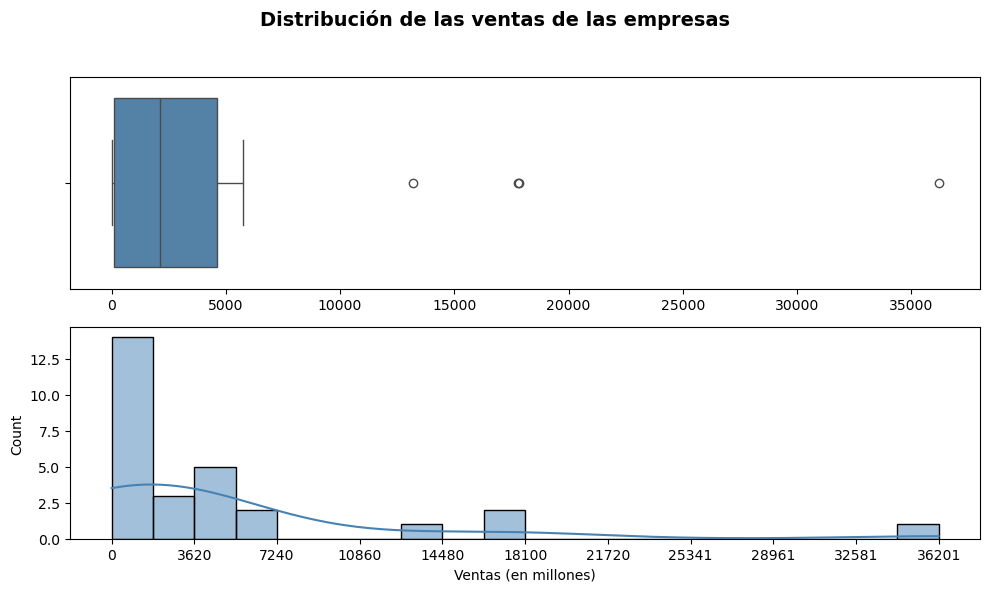

In [30]:
# Conversión de valores a millones
df_univariado['Ventas'] = df_univariado['6 new products sales:'] / 1_000_000

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de las ventas de las empresas", fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(
    x=df_univariado['Ventas'],
    color="steelblue",
    ax=axs[0]
)
axs[0].set_xlabel("")

# Histograma con KDE
sns.histplot(
    df_univariado['Ventas'],
    kde=True,
    color="steelblue",
    ax=axs[1],
    bins=20  # puedes aumentar este número si quieres más barras
)

# Ajustar ticks en el eje X del histograma
min_val = df_univariado['Ventas'].min()
max_val = df_univariado['Ventas'].max()
step = (max_val - min_val) / 10
axs[1].set_xticks(np.arange(min_val, max_val + step, step))
axs[1].set_xlabel("Ventas (en millones)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Sección 2 - Aplicación de modelo GRM y análisis bivariados**

In [43]:
# Cargue de datos de resultados del modelo GRM
df_grm=pd.read_excel("indices_grm_dimensiones_estandarizados.xlsx")

# Generación 
df_caracterizacion=df.copy()

# Dividir la columna 'industry_sector' en dos nuevas columnas: 'industry' y 'sector'
df_caracterizacion[['industry', 'sector']] = df_caracterizacion['1 industry/sector:'].str.split(', ', n=1, expand=True)
df_caracterizacion.columns

Index(['Company', 'Company_number',
       'LT \nLeader of Team)\n \nor\n \nTM \n(Team Member)', 'CODE',
       'Industry', '1 industry/sector:', '2 company size',
       '3 Age of the company:', 'Age of the company (segment)',
       '4 Geographic reach location:',
       ...
       'Indicate how often you participate in the development of optimal management solutions, reconfigurations and action plans aimed at customer acquisition.',
       'Please indicate the typical level of certainty you experience when developing optimal management solutions, reconfigurations, and action plans for customer acquisition.',
       'Indicate how often your company evaluates and monitors management's performance and practices against customer acquisition objectives.',
       'Indicate how effective your business is in evaluating and monitoring management performance and practices against customer acquisition objectives.',
       'Indicate how frequently you participate in evaluating and monitoring ma

In [45]:
# Traer al dataset de resultados del modelo GRM las variables de  caracterización de las empresas
df_grm_final = df_grm.merge(
    df_caracterizacion[['CODE',"Company",'2 company size',"industry","sector"]],
    on='CODE',
    how='left'
)

In [46]:
df_grm_final

,CODE,Indice_Sensing,Indice_Seizing,Indice_Transformation,Indice_Sensing_Z,Indice_Seizing_Z,Indice_Transformation_Z,Company,2 company size,industry,sector
0,C01-LT,1.584394,1.302203,1.820393,1.584908,1.307669,1.822736,C01,Big,Manufactura,Moda
1,C01-TM,1.613900,1.308076,1.837790,1.614417,1.313544,1.840152,C01,Big,Manufactura,Moda
2,C02-LT,0.475348,0.439359,0.792505,0.475718,0.444613,0.793801,C02,Big,Servicios,Comidas y bebidas
3,C02-TM,0.515720,0.432376,0.798164,0.516096,0.437629,0.799466,C02,Big,Servicios,Comidas y bebidas
4,C03-LT,0.421892,0.641390,0.577742,0.422256,0.646694,0.578820,C03,Big,Manufactura,Moda
5,C03-TM,2.710571,2.765776,2.698105,2.711230,2.771601,2.701344,C03,Big,Manufactura,Moda
6,C04-LT,-1.184263,-0.277212,-0.871277,-1.184107,-0.272134,-0.871677,C04,Medium,Servicios,Transporte y logística
7,C04-TM,0.249838,-0.525276,0.207694,0.250180,-0.520258,0.208394,C04,Medium,Servicios,Transporte y logística
8,C05-LT,-0.225619,0.316392,0.478978,-0.225338,0.321617,0.479954,C05,Medium,Servicios,Tecnología
9,C05-TM,0.862627,0.750814,0.317241,0.863048,0.756145,0.318053,C05,Medium,Servicios,Tecnología


In [52]:
# Promediar los valores de variables latentes por cada compañía
# Agrupar por empresa y calcular promedios de los índices latentes y sus z-scores
df_promedio_empresa = df_grm_final.groupby('Company').agg({
    'Indice_Sensing': 'mean',
    'Indice_Seizing': 'mean',
    'Indice_Transformation': 'mean',
    'Indice_Sensing_Z': 'mean',
    'Indice_Seizing_Z': 'mean',
    'Indice_Transformation_Z': 'mean',
    '2 company size': 'first',
    'industry': 'first',
    'sector': 'first'
}).reset_index()

In [53]:
df_promedio_empresa

,Company,Indice_Sensing,Indice_Seizing,Indice_Transformation,Indice_Sensing_Z,Indice_Seizing_Z,Indice_Transformation_Z,2 company size,industry,sector
0,C01,1.599147,1.305140,1.829091,1.599663,1.310607,1.831444,Big,Manufactura,Moda
1,C02,0.495534,0.435867,0.795335,0.495907,0.441121,0.796633,Big,Servicios,Comidas y bebidas
2,C03,1.566232,1.703583,1.637924,1.566743,1.709148,1.640082,Big,Manufactura,Moda
3,C04,-0.467213,-0.401244,-0.331791,-0.466963,-0.396196,-0.331641,Medium,Servicios,Transporte y logística
4,C05,0.318504,0.533603,0.398109,0.318855,0.538881,0.399003,Medium,Servicios,Tecnología
5,C06,-1.502069,-1.351313,-1.699216,-1.501954,-1.346499,-1.700460,Medium,Manufactura,Construcción
6,C07,0.241241,0.006293,-0.390087,0.241581,0.011441,-0.389997,Medium,Manufactura,Construcción
7,C08,-0.200324,-0.130438,0.592535,-0.200041,-0.125323,0.593628,Small,Manufactura,Moda
8,C09,2.190476,2.629447,2.181530,2.191067,2.635239,2.184242,Big,Comercio,Ferroelectrico
9,C10,0.501075,-0.009984,0.578918,0.501449,-0.004840,0.579997,Medium,Manufactura,Moda


In [54]:
# 1. Librerías necesarias
import pandas as pd
import pingouin as pg  # para Welch ANOVA y Games-Howell

# 3. Verificar los grupos de "2 company size"
print("Grupos en company size:", df_promedio_empresa['2 company size'].unique())

# 4. Welch ANOVA (sin asumir igualdad de varianzas)
welch = pg.welch_anova(dv='Indice_Sensing', between='2 company size', data=df_promedio_empresa)
print("\nWelch ANOVA resultados:")
print(welch)

# 5. Si Welch ANOVA es significativo (p < 0.05), hacer Games-Howell post-hoc
if welch['p-unc'].iloc[0] < 0.05:
    print("\nPost-hoc Games-Howell resultados:")
    posthoc = pg.pairwise_gameshowell(dv='Indice_Sensing', between='2 company size', data=df_promedio_empresa)
    print(posthoc)
else:
    print("\nNo hay diferencias significativas entre las medias de los grupos (p >= 0.05)")

Grupos en company size: ['Big' 'Medium' 'Small' 'Micro']

Welch ANOVA resultados:
           Source  ddof1     ddof2         F     p-unc       np2
0  2 company size      3  7.557884  7.531968  0.011528  0.610323

Post-hoc Games-Howell resultados:
        A       B   mean(A)   mean(B)      diff        se         T  \
0     Big  Medium  1.462847 -0.150094  1.612941  0.383533  4.205482   
1     Big   Micro  1.462847 -0.666762  2.129609  0.415852  5.121069   
2     Big   Small  1.462847 -0.188319  1.651167  0.361011  4.573724   
3  Medium   Micro -0.150094 -0.666762  0.516668  0.266390  1.939521   
4  Medium   Small -0.150094 -0.188319  0.038226  0.168402  0.226990   
5   Micro   Small -0.666762 -0.188319 -0.478442  0.232798 -2.055179   

          df      pval    hedges  
0   4.156366  0.042177  2.544522  
1   5.025877  0.013564  3.148820  
2   3.280397  0.049244  3.060074  
3   6.162223  0.303511  0.882304  
4  17.966837  0.995724  0.070498  
5   3.721458  0.313010 -1.348036  


C:\Users\1143835519\AppData\Local\Temp\ipykernel_32164\3276771390.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, inner=None, palette="Set2")


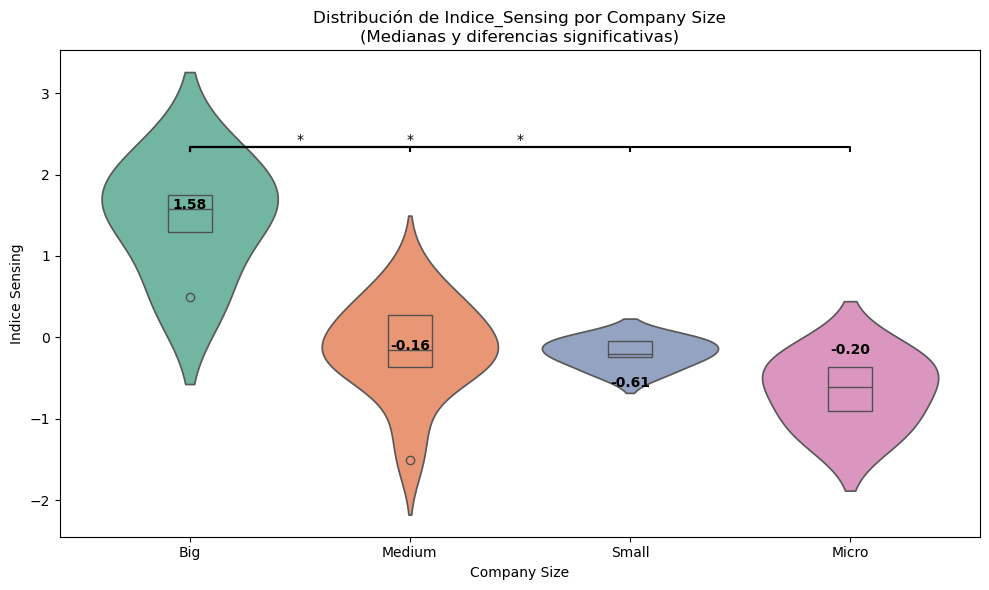

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# 1. Calcular la mediana por grupo (para anotarla)
medianas = df_promedio_empresa.groupby('2 company size')['Indice_Sensing'].median().reset_index()

# 2. Crear gráfica combinada (violin + boxplot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, inner=None, palette="Set2")
sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, width=0.2, showcaps=False, boxprops={'facecolor':'none'}, whiskerprops={'linewidth':0})

# 3. Anotar las medianas numéricas
for i, row in medianas.iterrows():
    plt.text(i, row['Indice_Sensing'], f"{row['Indice_Sensing']:.2f}", 
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# 4. Calcular pares significativos con Games-Howell (en df_promedio_empresa)
posthoc = pg.pairwise_gameshowell(dv='Indice_Sensing', between='2 company size', data=df_promedio_empresa)

# 5. Anotar significancia entre pares
pares_significativos = posthoc[posthoc['pval'] < 0.05]

for _, row in pares_significativos.iterrows():
    grupo1, grupo2 = row['A'], row['B']
    x1, x2 = sorted([df_promedio_empresa['2 company size'].unique().tolist().index(grupo1),
                     df_promedio_empresa['2 company size'].unique().tolist().index(grupo2)])
    y, h, col = df_promedio_empresa['Indice_Sensing'].max() + 0.1, 0.05, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * .5, y + h, "*", ha='center', va='bottom', color=col)

# 6. Personalizar gráfica
plt.title("Distribución de Indice_Sensing por Company Size\n(Medianas y diferencias significativas)")
plt.xlabel("Company Size")
plt.ylabel("Indice Sensing")
plt.tight_layout()
plt.show()


C:\Users\1143835519\AppData\Local\Temp\ipykernel_32164\3289610273.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, inner=None, palette="Set2", order=orden_categorias)


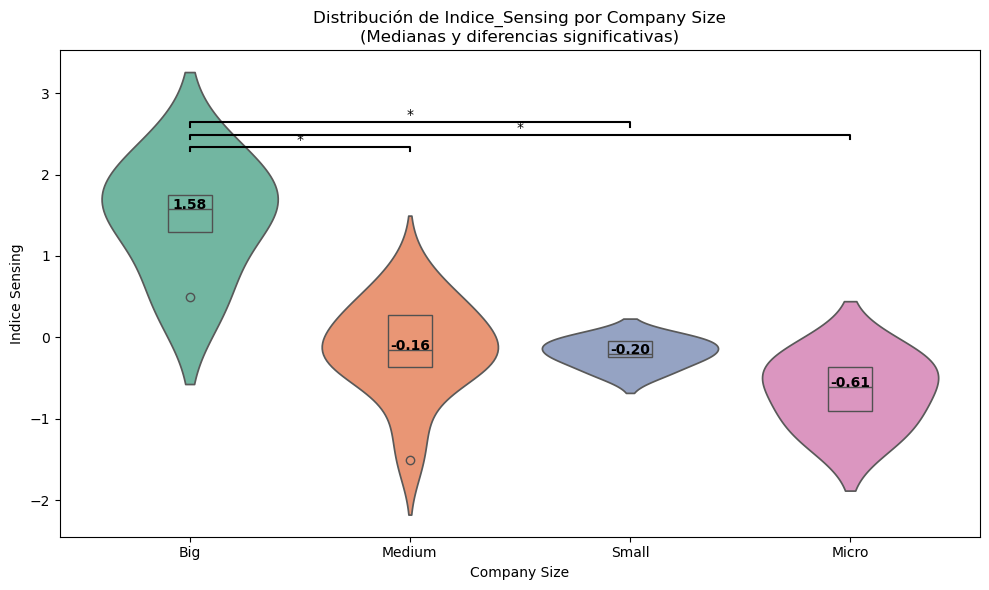

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# 1. Definir el orden explícito de las categorías (ajusta si es necesario)
orden_categorias = ['Big', 'Medium', 'Small', 'Micro']

# 2. Calcular la mediana por grupo
medianas = df_promedio_empresa.groupby('2 company size')['Indice_Sensing'].median().reset_index()

# 3. Crear gráfica combinada (violin + boxplot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, inner=None, palette="Set2", order=orden_categorias)
sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, width=0.2, showcaps=False, boxprops={'facecolor':'none'}, whiskerprops={'linewidth':0}, order=orden_categorias)

# 4. Anotar las medianas numéricas
for i, row in medianas.iterrows():
    plt.text(orden_categorias.index(row['2 company size']), row['Indice_Sensing'], 
             f"{row['Indice_Sensing']:.2f}", 
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# 5. Calcular pares significativos con Games-Howell
posthoc = pg.pairwise_gameshowell(dv='Indice_Sensing', between='2 company size', data=df_promedio_empresa)

# 6. Dibujar las líneas de significancia entre pares significativos
pares_significativos = posthoc[posthoc['pval'] < 0.05]

for _, row in pares_significativos.iterrows():
    grupo1, grupo2 = row['A'], row['B']
    x1, x2 = sorted([orden_categorias.index(grupo1), orden_categorias.index(grupo2)])
    y = df_promedio_empresa['Indice_Sensing'].max() + 0.1 + (0.15 * _)
    h, col = 0.05, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * .5, y + h, "*", ha='center', va='bottom', color=col)

# 7. Personalizar gráfica
plt.title("Distribución de Indice_Sensing por Company Size\n(Medianas y diferencias significativas)")
plt.xlabel("Company Size")
plt.ylabel("Indice Sensing")
plt.tight_layout()
plt.show()

C:\Users\1143835519\AppData\Local\Temp\ipykernel_32164\3579122059.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, ax=ax[0], palette="Set2", order=orden_categorias)


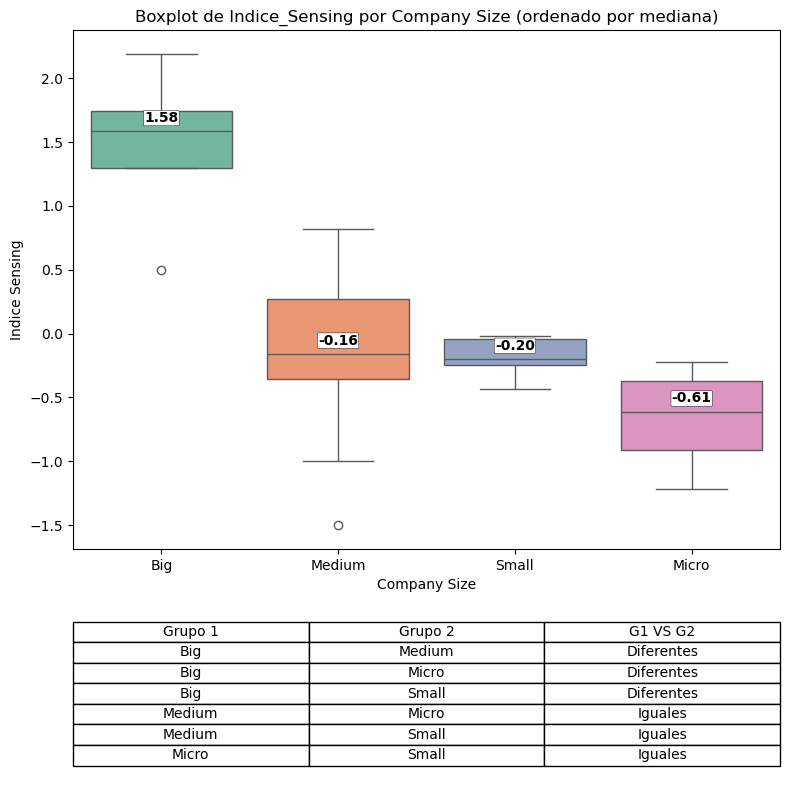

In [ ]:
# 1. Welch ANOVA + Games-Howell post-hoc
posthoc = pg.pairwise_gameshowell(dv='Indice_Sensing', between='2 company size', data=df_promedio_empresa)
posthoc['Interpretacion'] = posthoc['pval'].apply(lambda x: 'Diferentes' if x < 0.05 else 'Iguales')

# 2. Calcular medianas por grupo y ordenar de mayor a menor
medianas = df_promedio_empresa.groupby('2 company size')['Indice_Sensing'].median().reset_index()
orden_categorias = medianas.sort_values('Indice_Sensing', ascending=False)['2 company size'].tolist()

# 3. Crear figura (boxplot + tabla)
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

# Boxplot ordenado por mediana
sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, ax=ax[0], palette="Set2", order=orden_categorias)
ax[0].set_title("Boxplot de Indice_Sensing por Company Size (ordenado por mediana)")
ax[0].set_xlabel("Company Size")
ax[0].set_ylabel("Indice Sensing")

# 4. Anotar las medianas (cuadro más pequeño)
for i, row in medianas.iterrows():
    idx = orden_categorias.index(row['2 company size'])  # Posición según orden
    offset = 0.05  # Desplazamiento vertical
    ax[0].text(idx, row['Indice_Sensing'] + offset, 
               f"{row['Indice_Sensing']:.2f}", 
               ha='center', va='bottom', fontweight='bold', color='black',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.05', linewidth=0.3))

# 5. Tabla debajo del gráfico
tabla = posthoc[['A', 'B', 'Interpretacion']]
ax[1].axis('off')
tabla_text = tabla.values.tolist()
col_labels = ['Grupo 1', 'Grupo 2', 'G1 VS G2']
ax[1].table(cellText=tabla_text, colLabels=col_labels, loc='center', cellLoc='center')

plt.tight_layout()
plt.show()


Resultados Welch ANOVA:
           Source  ddof1     ddof2         F     p-unc       np2
0  2 company size      3  7.557884  7.531968  0.011528  0.610323

Welch ANOVA es significativo (p < 0.05). Aplicando Games-Howell...


C:\Users\1143835519\AppData\Local\Temp\ipykernel_32164\1119106213.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, ax=ax[0], palette="Set2", order=orden_categorias)


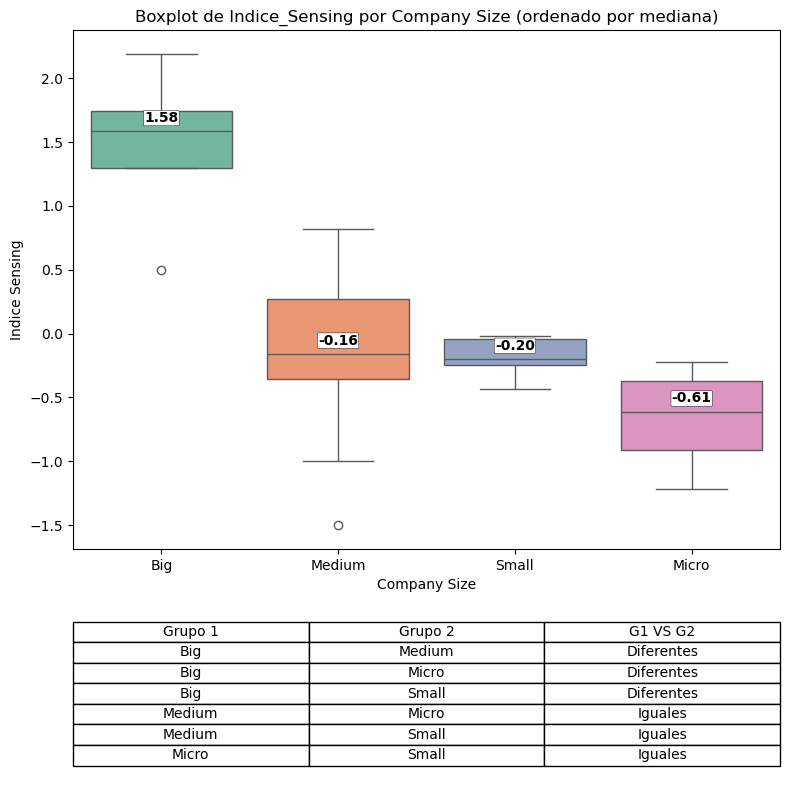

In [65]:
# 1. Welch ANOVA
welch = pg.welch_anova(dv='Indice_Sensing', between='2 company size', data=df_promedio_empresa)
print("\nResultados Welch ANOVA:")
print(welch)

# 2. Verificar si es significativo
if welch['p-unc'].iloc[0] < 0.05:
    print("\nWelch ANOVA es significativo (p < 0.05). Aplicando Games-Howell...")
    
    # 3. Games-Howell post-hoc
    posthoc = pg.pairwise_gameshowell(dv='Indice_Sensing', between='2 company size', data=df_promedio_empresa)
    posthoc['Interpretacion'] = posthoc['pval'].apply(lambda x: 'Diferentes' if x < 0.05 else 'Iguales')

    # 4. Calcular medianas por grupo y ordenarlas de mayor a menor
    medianas = df_promedio_empresa.groupby('2 company size')['Indice_Sensing'].median().reset_index()
    orden_categorias = medianas.sort_values('Indice_Sensing', ascending=False)['2 company size'].tolist()

    # 5. Crear figura (boxplot + tabla)
    fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

    sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, ax=ax[0], palette="Set2", order=orden_categorias)
    ax[0].set_title("Boxplot de Indice_Sensing por Company Size (ordenado por mediana)")
    ax[0].set_xlabel("Company Size")
    ax[0].set_ylabel("Indice Sensing")

    # Anotar las medianas con cuadro pequeño
    for i, row in medianas.iterrows():
        idx = orden_categorias.index(row['2 company size'])
        offset = 0.05
        ax[0].text(idx, row['Indice_Sensing'] + offset, 
                   f"{row['Indice_Sensing']:.2f}", 
                   ha='center', va='bottom', fontweight='bold', color='black',
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.05', linewidth=0.3))

    # 6. Tabla debajo del gráfico
    tabla = posthoc[['A', 'B', 'Interpretacion']]
    ax[1].axis('off')
    tabla_text = tabla.values.tolist()
    col_labels = ['Grupo 1', 'Grupo 2', 'G1 VS G2']
    ax[1].table(cellText=tabla_text, colLabels=col_labels, loc='center', cellLoc='center')

    plt.tight_layout()
    plt.show()

else:
    print("\nWelch ANOVA no es significativo (p >= 0.05). No se aplicará Games-Howell ni se generará la gráfica.")


# **Sección 2 - Análisis de Componentes Principales & Clustering**b

## **Preparación de los Datos**

In [ ]:
import pandas as pd

# Cargar el Excel sin encabezado, para poder inspeccionar cualquier fila
df = pd.read_excel("prueba.xlsx", header=None)

In [ ]:
# Fila 3 en Excel corresponde al índice 2 en Python
header_row = df.iloc[2]

In [ ]:
# Definir las columnas base (A a AA => índices 0 a 26)
base_cols = list(range(0, 27))

In [ ]:
# Encontrar las columnas con las palabras clave en la fila 3
sensing_cols = [i for i, val in enumerate(header_row) if isinstance(val, str) and 'Sensing' in val]
seizing_cols = [i for i, val in enumerate(header_row) if isinstance(val, str) and 'Seizing' in val]
transformation_cols = [i for i, val in enumerate(header_row) if isinstance(val, str) and 'Transformation' in val]

In [ ]:
# Unir las columnas base con las específicas, evitando duplicados
cols_sensing = sorted(list(set(base_cols + sensing_cols)))
cols_seizing = sorted(list(set(base_cols + seizing_cols)))
cols_transformation = sorted(list(set(base_cols + transformation_cols)))

In [ ]:
# Filtrar las filas entre la 9 y 65 (índices 8 a 64)
bd_sensing = df.iloc[8:65, cols_sensing]
bd_seizing = df.iloc[8:65, cols_seizing]
bd_transformation = df.iloc[8:65, cols_transformation]

In [36]:
# Dejar ùnicamente las columnas requeridas (CODE de empresa y las de Sensing)
bd_sensing_PCA = bd_sensing.iloc[:, [3] + list(range(27, 109))]

# Promover a encabezados la primera fila
bd_sensing_PCA.columns = bd_sensing_PCA.iloc[0]

# Eliminar la primera fila (que ahora es el encabezado)
bd_sensing_PCA = bd_sensing_PCA[1:]

#  Reiniciar el índice
bd_sensing_PCA.reset_index(drop=True, inplace=True)
bd_sensing_PCA.head(5)

# Establecer "CODE" como índice
bd_sensing_PCA = bd_sensing_PCA.set_index("CODE")

# Convertir las columnas a int
bd_sensing_PCA = bd_sensing_PCA.astype(int)
bd_sensing_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, C01-LT to C28-TM
Data columns (total 82 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype
---  ------                                                                                                                                                                                                                        --------------  -----
 0   Indicate how often your business identifies and defines performance challenges or opportunities, particularly in relation to customer acquisition.                                                                            56 non-null     int32
 1   Indicate how effective your business is to identify and define challenges or performance opportunities, particularly in relation to customer 

In [5]:
# PASO 1: Instalar py-irt si no lo tienes
# pip install py-irt

import pandas as pd
from py_irt import irt_grm, preprocess_data

# 1. Leer archivo Excel
df = pd.read_excel("bd_sensing_PCA.xlsx")  # Asegúrate de tener este archivo en tu carpeta de trabajo

# 2. Separar respuestas y convertir a numérico
df_respuestas = df.drop(columns=["CODE"])
df_respuestas = df_respuestas.apply(pd.to_numeric)

# 3. Convertir a formato long para py-irt
long_data = []
for person_idx, row in df_respuestas.iterrows():
    for item_idx, value in enumerate(row):
        long_data.append({
            "user_id": str(person_idx),
            "item_id": str(item_idx),
            "response": int(value)
        })

df_long = pd.DataFrame(long_data)

# 4. Preprocesar para GRM
processed_data = preprocess_data(df_long, model_type="grm")

# 5. Ajustar el modelo GRM
modelo_grm = irt_grm.train_model(
    processed_data,
    num_samples=1000,
    num_warmup=500,
    chains=1
)

# 6. Obtener los thetas estimados (score latente por individuo)
theta_dict = modelo_grm.get_theta_means()
df_theta = pd.DataFrame(list(theta_dict.items()), columns=["user_id", "Indice_GRM"])
df_theta["user_id"] = df_theta["user_id"].astype(int)

# 7. Recuperar la columna CODE original y unir con resultados
df_codes = df[["CODE"]].copy()
df_codes["user_id"] = df_codes.index

df_resultado = df_theta.merge(df_codes, on="user_id")[["CODE", "Indice_GRM"]]

# 8. Guardar resultado final
df_resultado.to_excel("indice_grm_pyirt.xlsx", index=False)

# Mostrar primeros resultados
print(df_resultado.head())

ImportError: cannot import name 'irt_grm' from 'py_irt' (c:\Users\1143835519\AppData\Local\anaconda3\Lib\site-packages\py_irt\__init__.py)

## **Bases de datos para cada dimensión**

**Sensing**

bd_sensing.info()
bd_sensing.head(5)

**Seizing**

bd_seizing.info()
bd_seizing.head(5)

**Transformation**

bd_transformation.info()
bd_transformation.head(5)

## **Implementación del PCA**

In [37]:
# Codificación ordinal (de respuestas tipo Likert)
encoder = OrdinalEncoder()
df_encoded = pd.DataFrame(
    encoder.fit_transform(bd_sensing_PCA),
    columns=bd_sensing_PCA.columns,
    index=bd_sensing_PCA.index
)

In [38]:
# Ajustar MCA sin restringir número de componentes
mca = MCA(random_state=123)
mca_fit = mca.fit(df_encoded)

In [39]:
# Obtener coordenadas de las columnas (categorías dummificadas)
col_coords = mca_fit.column_coordinates(df_encoded)

# El número de componentes es igual al número de columnas en col_coords
num_componentes = col_coords.shape[1]

print(f"Número de componentes detectados por el MCA: {num_componentes}")

Número de componentes detectados por el MCA: 2


In [40]:
# Calcular proporción de varianza explicada (inercia) por cada componente
col_coords = mca_fit.column_coordinates(df_encoded)
eigenvalues = (col_coords ** 2).sum(axis=0) / col_coords.shape[0]
inertia = eigenvalues / eigenvalues.sum()

# Mostrar proporción explicada por el componente 1
print(f"Proporción de varianza explicada por el componente 1: {inertia[0]:.4f}")

Proporción de varianza explicada por el componente 1: 0.5780


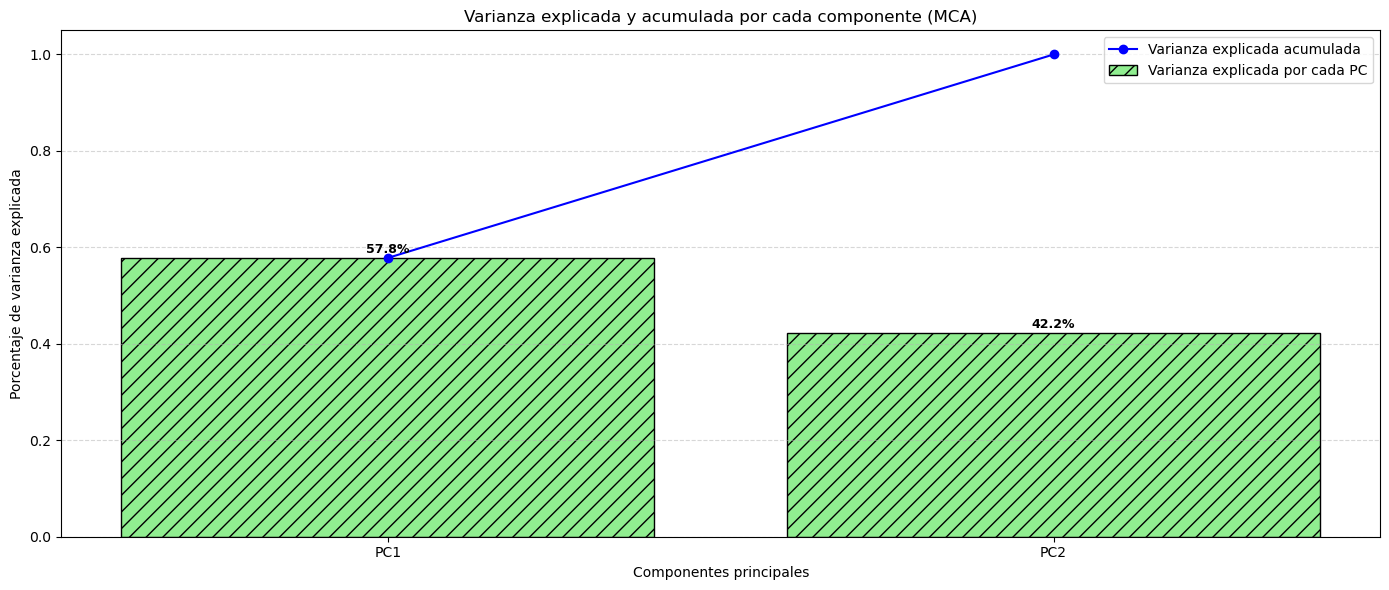

In [41]:
# Obtener coordenadas de las columnas para calcular inercia (varianza explicada)
col_coords = mca_fit.column_coordinates(df_encoded)
eigenvalues = (col_coords ** 2).sum(axis=0) / col_coords.shape[0]
inertia = eigenvalues / eigenvalues.sum()
cumulative_inertia = np.cumsum(inertia)

# Crear gráfico
plt.figure(figsize=(14, 6))
x = np.arange(1, len(inertia) + 1)

# Barras: varianza explicada individual
bars = plt.bar(x, inertia, color='lightgreen', edgecolor='black', hatch='//', label='Varianza explicada por cada PC')

# Línea: varianza explicada acumulada
plt.plot(x, cumulative_inertia, color='blue', marker='o', label='Varianza explicada acumulada')

# Etiquetas encima de cada barra
for i, val in enumerate(inertia):
    plt.text(x[i], val + 0.01, f'{val*100:.1f}%', ha='center', fontsize=9, fontweight='bold')

# Estética del gráfico
plt.xlabel("Componentes principales")
plt.ylabel("Porcentaje de varianza explicada")
plt.title("Varianza explicada y acumulada por cada componente (MCA)")
plt.xticks(x, [f'PC{i}' for i in x])
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [42]:
# Extraer el primer componente (índice latente por individuo)
individual_coords = mca_fit.row_coordinates(df_encoded)
indice_mca = individual_coords[0]  # columna 0 = primer componente
indice_mca.name = "Indice_MCA"

In [43]:
# Normalizar a escala de 1 a 5 (min-max scaling)
min_val = indice_mca.min()
max_val = indice_mca.max()
indice_likert = 1 + 4 * (indice_mca - min_val) / (max_val - min_val)
indice_likert.name = "Indice_Likert"

In [44]:
# Paso 5: Combinar resultados en un solo DataFrame
df_indice = pd.concat([indice_mca, indice_likert], axis=1)

# Mostrar tabla final
display(df_indice)

,Indice_MCA,Indice_Likert
CODE,,
C01-LT,0.186381,2.818482
C01-TM,0.215747,2.907622
C02-LT,0.096894,2.546848
C02-TM,0.050426,2.405795
C03-LT,0.028324,2.338705
C03-TM,0.905059,5.000000
C04-LT,-0.163642,1.756001
C04-TM,-0.116836,1.898079
C05-LT,0.021063,2.316665


### **Caracterizacion**

In [45]:
bd_sensing_caracterizacion=bd_sensing.copy()
bd_sensing_caracterizacion.columns = bd_sensing_caracterizacion.iloc[0]
bd_sensing_caracterizacion = bd_sensing_caracterizacion[1:]
bd_sensing_caracterizacion.head(5)

8,Company,Company_number,LT \nLeader of Team)\n \nor\n \nTM \n(Team Member),CODE,Industry,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,1 status quo,2 Risk take,3 Creative Confidence,4 Questioning,5 Observing,6 Networking,7 Experimenting,8 associating,9 Analysis,10 planning,11 Detail oriented,12 Discipline,"Indicate how often your business identifies and defines performance challenges or opportunities, particularly in relation to customer acquisition.","Indicate how effective your business is to identify and define challenges or performance opportunities, particularly in relation to customer acquisition.","Indicate how often you participate in the identification and definition of challenges or opportunities for performance within your business development processes, particularly in relation to the acquisition of customers.","Indicate the typical level of certainty that you experience by identifying and defining challenges or opportunities for business development, particularly in relation to the acquisition of clients.",Indicate how often your business establishes clear objectives and performance priorities for the acquisition of customers in business development.,Indicate how effective your business to establish clear objectives and performance priorities for the acquisition of customers in business development.,Indicate how often you participate in establishing clear objectives and performance priorities for the acquisition of clients in business development.,Indicate the typical level of certainty that you experience when establishing clear objectives and performance priorities for the acquisition of clients in business development.,Income growth,Increased market share,Launch of new services and/or products,Geographical expansion,Investment return (ROI),Indicate how often your business identifies and defines innovation problems or opportunities to boost customer acquisition.,Indicate how effective your business is to identify and define problems of innovation or opportunities to promote customer acquisition.,Indicate how often you participate in the identification and definition of innovation problems or opportunities to boost customer acquisition.,Indicate the typical level of certainty that you experience by identifying and defining innovation problems or opportunities to boost customer acquisition.,Indicate how often your business establishes clear objectives and performance priorities in innovation for customer acquisition.,Indicate how effective your business is to establish clear objectives and performance priorities in innovation for customer acquisition.,Indicate how often you participate in establishing clear objectives and performance priorities in innovation for customer acquisition.,Indicate the typical level of certainty that you experience when establishing clear objectives and performance priorities in innovation for customer acquisition.,Launch of new services and/or products,R&D investment,Intellectual property,Market share and competitive advantage,Efficiency and cost savings:,Indicate how often your company identifies and defines value proposals for customer acquisition.,Indicate how effective your business to identify and define value proposals for customer acquisition.,Indicate how often you participate in the identification and definition of value proposals for customer acquisition.,Indicate the typical level of certainty that you experience by identifying and defining value proposals for customer acquisition.,Indicate how often your business establishes clear objectives and priorities for value proposals adapted for customer acquisition.,Indicate how effective your business to establish clear objectives and priorities for the proposals for adapted value for the acquisition of customers.,Indicate how o

In [46]:
bd_sensing_indice=df_indice.copy()

# Convertir el indice en columna
bd_sensing_indice.reset_index(inplace=True)
bd_sensing_indice.info()

# Hacer un merge entre bd_sensing_indice y bd_sensing_caracterizacion para traer company size
bd_sensing_caracterizacion = bd_sensing_caracterizacion.merge(bd_sensing_indice, on="CODE", how="left")
bd_sensing_caracterizacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CODE           56 non-null     object 
 1   Indice_MCA     56 non-null     float64
 2   Indice_Likert  56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 111 entries, Company to Indice_Likert
dtypes: float64(2), object(109)
memory usage: 48.7+ KB


#### **Sensing vs tamaño de la compañia**

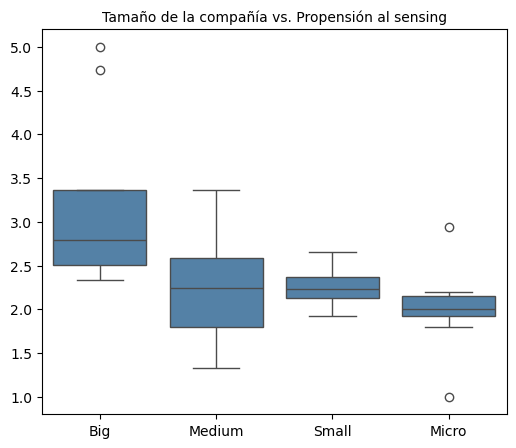

In [47]:
tabla_cont=bd_sensing_caracterizacion.groupby(by=["2 company size"])["Indice_Likert"].describe().sort_values(by='50%', ascending=False)
plt.figure(figsize=(6, 5))
sns.boxplot(x=bd_sensing_caracterizacion['2 company size'], y=bd_sensing_caracterizacion['Indice_Likert'],color="steelblue", order=tabla_cont.sort_values(by='50%', ascending=False).index)
plt.title("Tamaño de la compañía vs. Propensión al sensing",fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.show()

#### **Sensing vs ubicación geográfica**

In [48]:
tabla_cont=bd_sensing_caracterizacion.groupby(by=["4 Geographic reach location:"])["Indice_Likert"].describe().sort_values(by='mean', ascending=False)
tabla_cont

,count,mean,std,min,25%,50%,75%,max
4 Geographic reach location:,,,,,,,,
International,6.0,2.499168,1.155874,1.756001,1.823418,1.971046,2.583581,4.734950
Regional,4.0,2.469200,0.456775,2.048137,2.088953,2.460520,2.840767,2.907622
Local,28.0,2.360930,0.730299,1.000000,2.064462,2.257201,2.466221,5.000000
National,18.0,2.217353,0.469358,1.352040,1.997299,2.261468,2.581109,2.906183


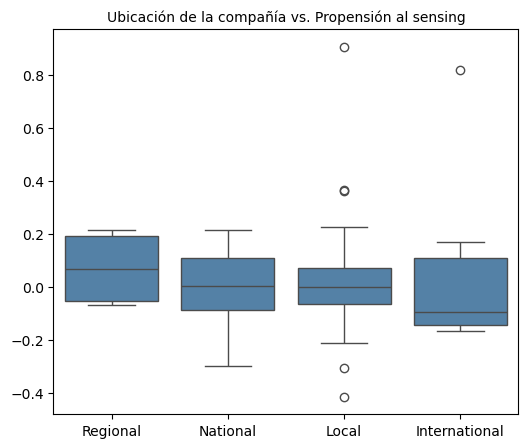

In [49]:
tabla_cont=bd_sensing_caracterizacion.groupby(by=["4 Geographic reach location:"])["Indice_Likert"].describe().sort_values(by='50%', ascending=False)
plt.figure(figsize=(6, 5))
sns.boxplot(x=bd_sensing_caracterizacion['4 Geographic reach location:'], y=bd_sensing_caracterizacion['Indice_MCA'],color="steelblue", order=tabla_cont.sort_values(by='50%', ascending=False).index)
plt.title("Ubicación de la compañía vs. Propensión al sensing",fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.show()

#### **Sensing vs Ventas último año**

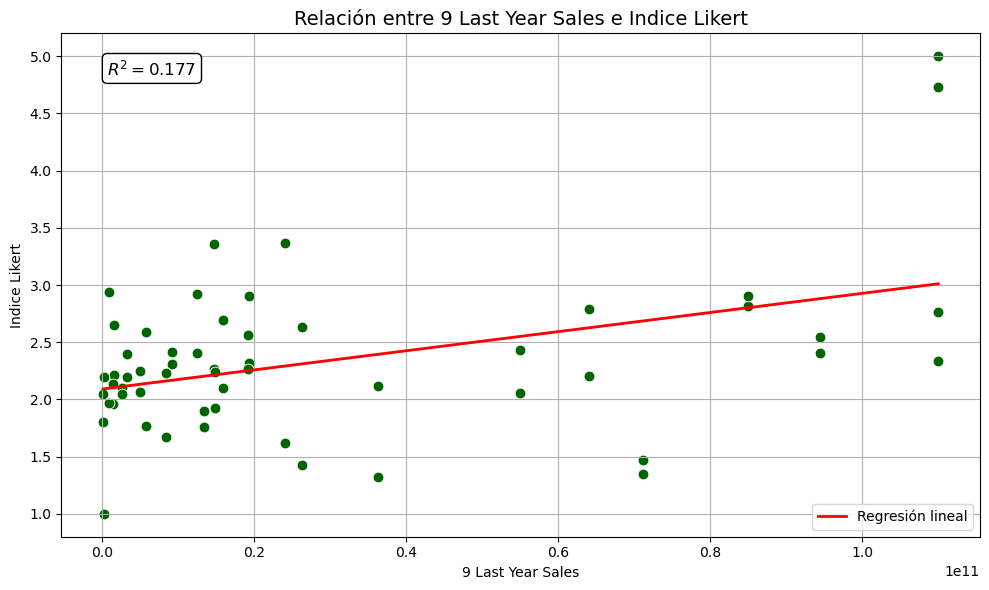

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Variables específicas
df = bd_sensing_caracterizacion
x_var = "9 Last Year Sales"
y_var = "Indice_Likert"

# Filtrar datos sin valores nulos
df_plot = df[[x_var, y_var]].dropna()

# Ajustar modelo de regresión lineal
X = df_plot[[x_var]]  # matriz de diseño (2D)
y = df_plot[y_var]
modelo = LinearRegression().fit(X, y)

# Predecir valores y calcular R²
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_var, y=y_var, data=df_plot, color='darkgreen', s=60)
sns.lineplot(x=df_plot[x_var], y=y_pred, color='red', linewidth=2, label='Regresión lineal')

# Anotar R² en el gráfico
plt.text(0.05, 0.95, f"$R^2 = {r2:.3f}$", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", fc="white", ec="black"))

# Personalización
plt.title("Relación entre 9 Last Year Sales e Indice Likert", fontsize=14)
plt.xlabel("9 Last Year Sales")
plt.ylabel("Indice Likert")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
